# UNIQLO SALES Analaysis

Data: Uniqlo L2W1 Sales

Columns (total 12 columns):
1. store id
2. city: city in china
3. channel: online or in store
4. gender: female or male
5. age group: age range
6. wkd_ind: weekday or weekend
7. product: product types
8. customer: number of custoemrs?
9. revenue: total revenue that day
10. order: number of orders
11. quant: number of quantities
12. unit_cost: how much is the product

# Problems trying to solve:
0. Revenue vs. order (line graph)
1. how many unique cities in total?
2. More revenue online or in store?
3. which is the best selling product based on revenue/quant?
4. Are there more selling on weekday or weekend?
5. Which age group contribute to more revenue/order
6. gender/age vs. revenue
7. which city contribute to more revenue?
8. which store in each city has the highest revenue? 

# EXPLORE DATA

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
data=pd.read_csv("23 L2W1-优衣库数据.csv")
data.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,Shenzhen,In Store,Female,25-29,Weekday,Seasonal New Items,4,796.0,4,4,59
1,146,Hangzhou,In Store,Female,25-29,Weekday,Fitness Products,1,149.0,1,1,49
2,70,Shenzhen,In Store,Male,>=60,Weekday,UT(T-shirts),2,178.0,2,2,49
3,658,Shenzhen,In Store,Female,25-29,Weekday,UT(T-shirts),1,59.0,1,1,49
4,229,Shenzhen,In Store,Male,20-24,Weekend,Socks,2,65.0,2,3,9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


## unique cities:

In [10]:
#10 unique cities total
data.city.unique()

array(['Shenzhen', 'Hangzhou', 'Wuhan', 'Beijing', 'Chongqing', 'Xian',
       'Guangzhou', 'Nanjing', 'Shanghai', 'Chengdu'], dtype=object)

In [79]:
city_store=data.groupby('city')['store_id'].nunique().reset_index()
city_store

,city,store_id
0,Beijing,1
1,Chengdu,5
2,Chongqing,6
3,Guangzhou,6
4,Hangzhou,11
5,Nanjing,1
6,Shanghai,6
7,Shenzhen,11
8,Wuhan,11
9,Xian,6


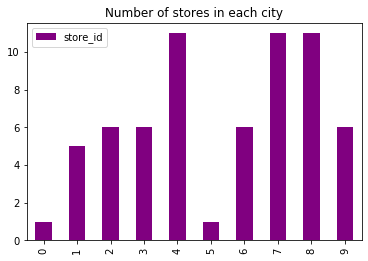

In [80]:
city_store.plot(kind='bar',color='purple', title='Number of stores in each city')

Text(0, 0.5, 'Number of store')

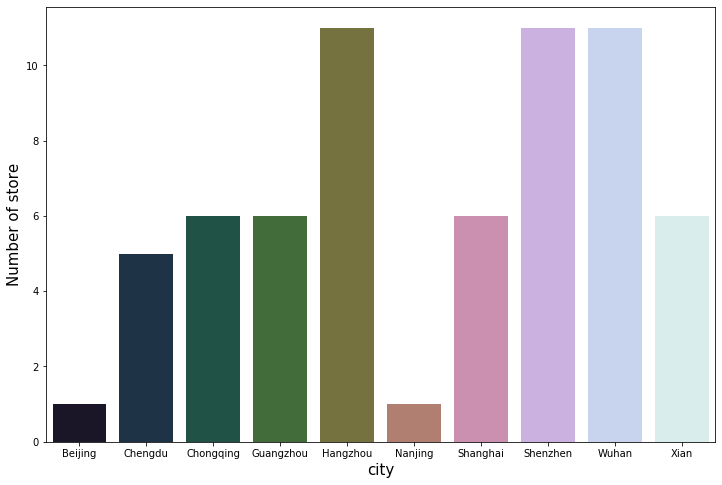

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(x='city', y='store_id', data=city_store, palette="cubehelix")
plt.tick_params(labelsize=10)
plt.xlabel('city',fontsize=15)
plt.ylabel('Number of store',fontsize=15)

There are total 10 unique cities. The dataset includes more store data from hangzhou, wuhan, shenzhen; 

## Online or in store purchase 

In [13]:
channel_mode=data.channel.value_counts()
channel_mode

In Store    18403
Online       3890
Name: channel, dtype: int64

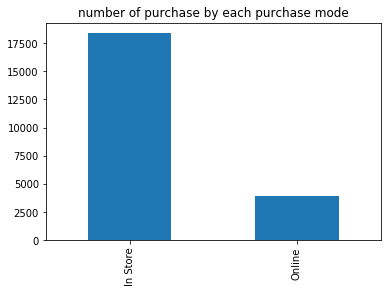

In [14]:
channel_mode.plot(kind='bar', title='number of purchase by each purchase mode')

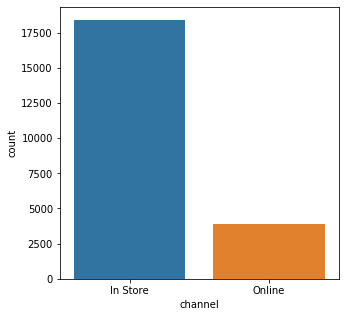

In [89]:
plt.figure(figsize=(5,5))
sns.countplot(x='channel', data=data)

Overall, there are more in store purchase than online purchase, which is expected. 

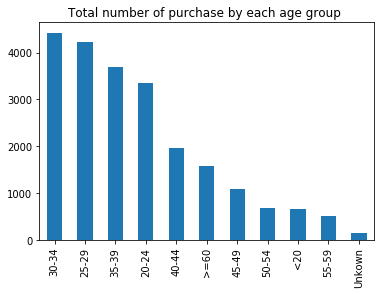

In [15]:
age=data.age_group.value_counts()
age
age.plot(kind='bar', title="Total number of purchase by each age group ")

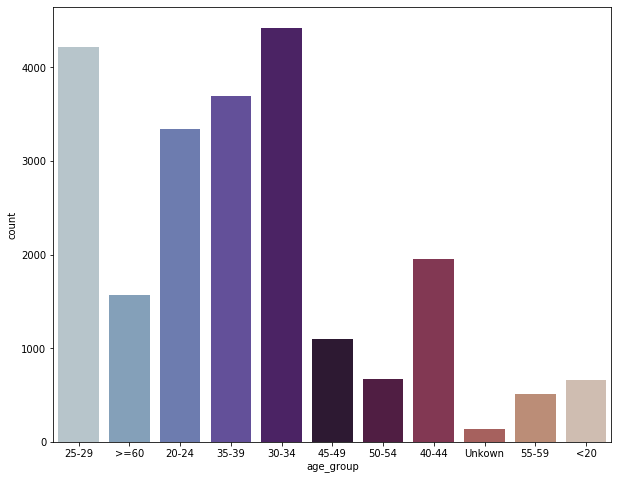

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(x='age_group', data=data, palette="twilight")

In [16]:
age.sum()

22293

The data shows that there are more purchases made by age group 30-34.
There is a small amount of "unknown" data that I decided to ignore for now because it is less than 10%.

## Purchase mode vs revenue 

In [17]:
# Are there more revenue made by online or instore?

r_channel=data.groupby(['channel']).agg({"revenue":sum})
r_channel

,revenue
channel,
In Store,2903262.37
Online,653170.48


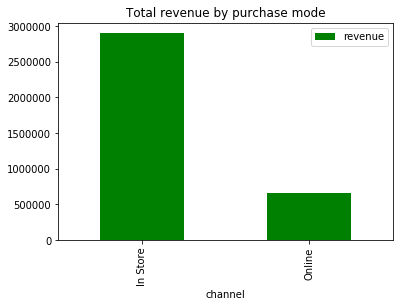

In [52]:
r_channel.plot(kind='bar', color='green', title="Total revenue by purchase mode")

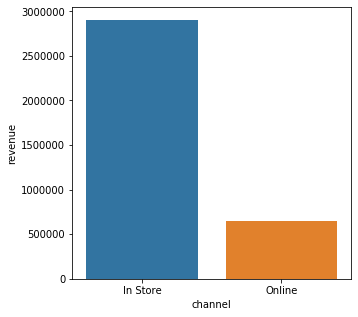

In [95]:
r_channel_sns=data.groupby('channel')['revenue'].sum().reset_index()
r_channel_sns

plt.figure(figsize=(5,5))
sns.barplot(x='channel', y='revenue', data=r_channel_sns)

The result indicates that there are more revenue made in store, which makes sense because there are more in store pruchase. 

## city vs revnue: 

In [19]:
r_city=data.groupby(["city"]).agg({"revenue":sum})
r_city

,revenue
city,
Beijing,130458.62
Chengdu,208189.86
Chongqing,263492.65
Guangzhou,318124.49
Hangzhou,589518.49
Nanjing,123150.93
Shanghai,389821.73
Shenzhen,733123.68
Wuhan,589777.78


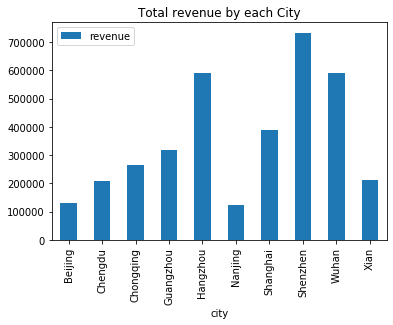

In [43]:
r_city.plot(kind="bar",title="Total revenue by each City")

In [118]:
city_revenue=data.groupby(['city','store_id'])['revenue'].sum().reset_index()
city_revenue

,city,store_id,revenue
0,Beijing,21,130458.62
1,Chengdu,98,41145.35
2,Chengdu,360,48392.83
3,Chengdu,430,34697.97
4,Chengdu,605,37449.81
...,...,...,...
59,Xian,336,37082.68
60,Xian,429,36368.15
61,Xian,442,37276.34
62,Xian,648,36732.90


Text(0, 0.5, 'Revenue')

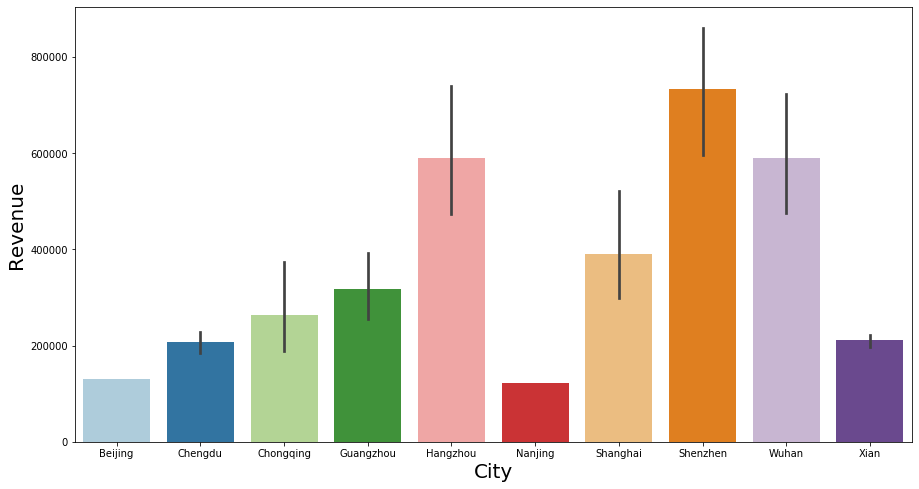

In [134]:
# plot with seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='city', y='revenue',data=city_revenue, 
            palette='Paired',estimator=sum)
plt.tick_params(labelsize=10)
plt.xlabel('City', fontsize=20)
plt.ylabel('Revenue', fontsize=20)

Text(0, 0.5, 'Revenue')

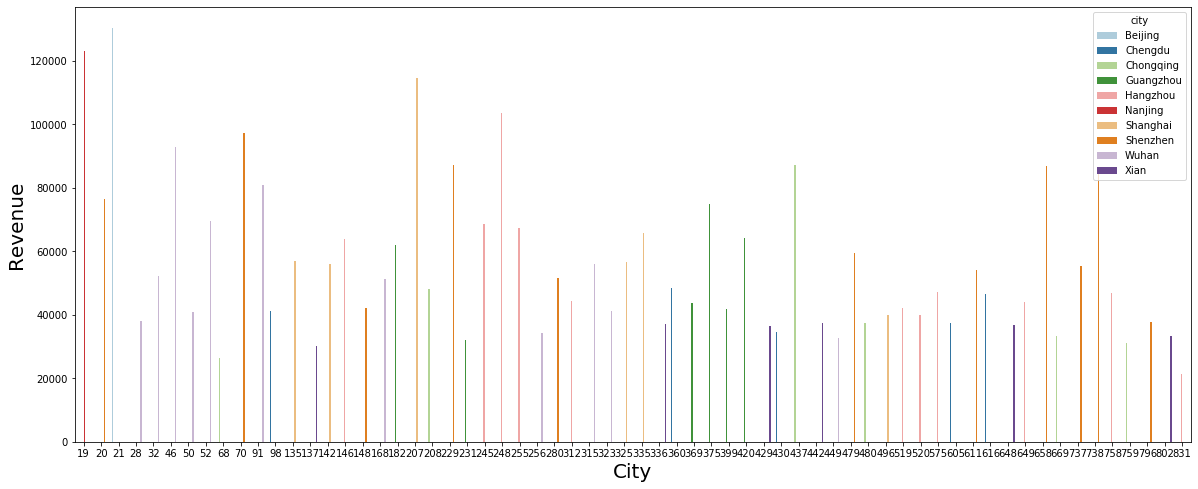

In [131]:
# plot with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='store_id', y='revenue', hue='city',data=city_revenue, 
            palette='Paired',estimator=sum)
plt.tick_params(labelsize=10)
plt.xlabel('City', fontsize=20)
plt.ylabel('Revenue', fontsize=20)


## Weekday vs weekend and revenue

In [21]:
wkcounts=data.wkd_ind.value_counts()
wkcounts

Weekday    12465
Weekend     9828
Name: wkd_ind, dtype: int64

There are more weekday data compared to weekend

In [22]:
r_o_wek=data.groupby(["wkd_ind"]).agg({"revenue":np.mean, "order":np.mean})
r_o_wek

,revenue,order
wkd_ind,,
Weekday,167.986200,1.739430
Weekend,148.807984,1.541107


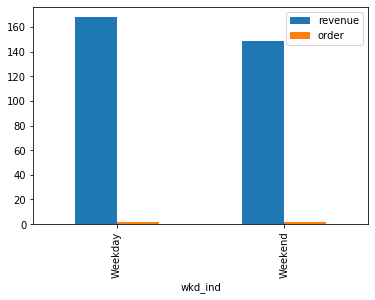

In [46]:
r_o_wek.plot(kind='bar')

Text(0, 0.5, 'Revenue')

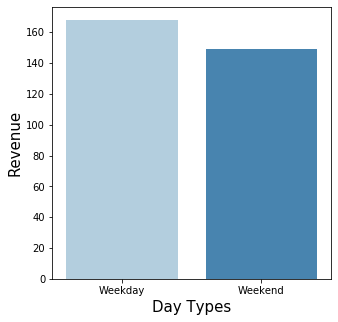

In [97]:

revenue_week=data.groupby('wkd_ind')['revenue'].mean().reset_index()

plt.figure(figsize=(5,5))
sns.barplot(x='wkd_ind',y='revenue', data=revenue_week, palette="Blues")
plt.tick_params(labelsize=10)
plt.xlabel('Day Types',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

Weekday contributes to more average revenue compared to weekend. 

# Products

In [24]:
# how many unique product?
data['product'].unique()


array(['Seasonal New Items', 'Fitness Products', 'UT(T-shirts)', 'Socks',
       'Shorts', 'Jeans', 'Sweater', 'Accessories', 'Dress'], dtype=object)

In [99]:
r_products=data.groupby(["product"]).agg({"revenue":sum}).reset_index()
r_products

,product,revenue
0,Accessories,444685.15
1,Dress,137302.78
2,Fitness Products,118059.68
3,Jeans,246127.48
4,Seasonal New Items,590664.88
5,Shorts,107485.88
6,Socks,127731.36
7,Sweater,245630.80
8,UT(T-shirts),1538744.84


Text(0, 0.5, 'Revenue')

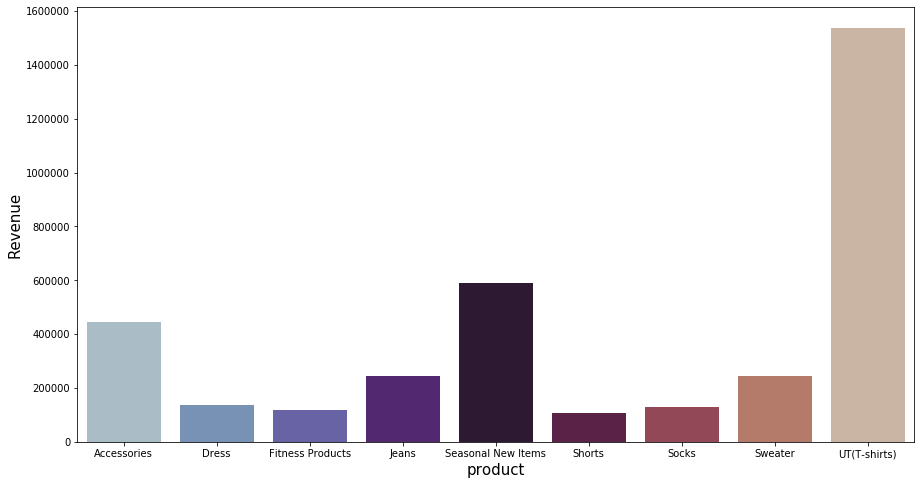

In [137]:
plt.figure(figsize=(15,8))
sns.barplot(x='product',y='revenue', data=r_products,palette="twilight")
plt.tick_params(labelsize=10)
plt.xlabel('product',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

t-shirts contribute to the most revenue

# purchase mode, products and customer

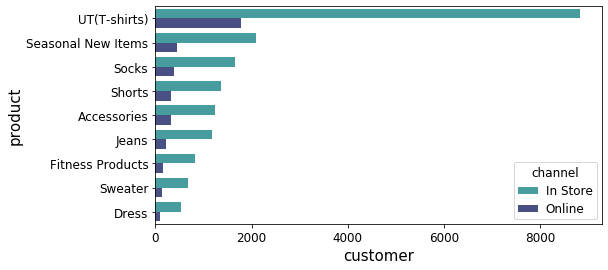

In [101]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='product',hue='channel',data=data,order=data['product'].value_counts().index,palette="mako_r")
plt.tick_params(labelsize=12)
plt.xlabel('customer',fontsize=15)
plt.ylabel('product',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

# Gender and purchase

In [136]:
gender_count=data['gender_group'].value_counts()
gender_count

Female    14208
Male       7967
Unkown      118
Name: gender_group, dtype: int64

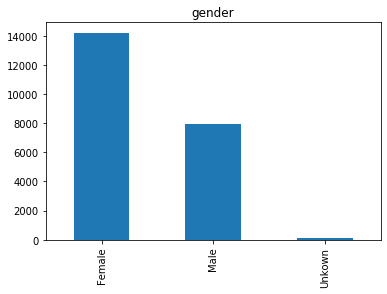

In [116]:
gender_count.plot(kind='bar', title='gender')

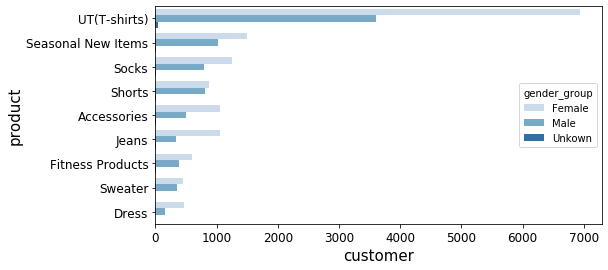

In [102]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='product',
                   hue='gender_group',
                   data=data,
                   order=data['product'].value_counts().index,palette="Blues")
plt.tick_params(labelsize=12)
plt.xlabel('customer',fontsize=15)
plt.ylabel('product',fontsize=15)
plt.show()

# Gender/purchase mode

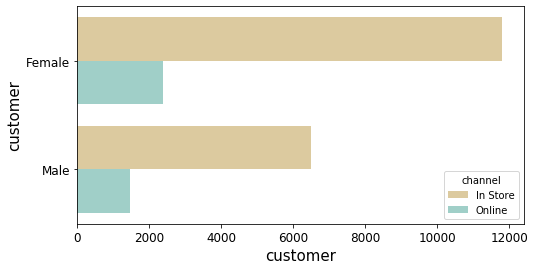

In [103]:
data_gender = data[data['gender_group'].isin(['Female','Male'])]
plt.figure(figsize=(8,4))
sns.countplot(y='gender_group',hue='channel',data=data_gender,palette="BrBG")
plt.tick_params(labelsize=12)
plt.xlabel('customer',fontsize=15)
plt.ylabel('customer',fontsize=15)
plt.show()